In [2]:
from pl_packages import *
from tail_functions import *
from plotting_functions import *

In [3]:
#Font sizes and labels for plots
font_sizes=[15,15,15,15,15]
label_arr0=[r'$w$',r'$\mathbb{P}(W>w)$',font_sizes,0] #no legend
label_arr1=[r'$w$',r'$\mathbb{P}(W>w)$',font_sizes,1] #legend

#directory to save plots
direc_save ='/home/samuel/Documents/other/other_p/research/power_laws/pl_code/plots/' 

In [4]:
b=2
x_m=10
n=10**3

pareto_sample=pareto.rvs(b, scale=x_m, size=n)

In [5]:
#MLE fit
pareto_fit_vec=get_power_law_fit(pareto_sample,x_m)

print(pareto_fit_vec[2],pareto_fit_vec[3])

72.2255718583452 1.8586909891308494


In [6]:
#Linear regression fit - zero intercept
#https://math.stackexchange.com/questions/3297060/linear-regression-without-intercept-formula-for-slope

pl_reg_fit_vec=pl_reg_fit(pareto_sample,x_m)

print(pl_reg_fit_vec[2],pl_reg_fit_vec[3])

67.92790008788702 1.8320481890888956


In [7]:
#Non-linear regression fit, one parameter free

b0=1

pl_nl_fit_vec=pl_nlr_fit(pareto_sample,b0,x_m)

print(pl_nl_fit_vec[2],pl_nl_fit_vec[3])

[73.73162594] [1.86765381]


In [8]:
x,y=tail(pareto_sample)

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

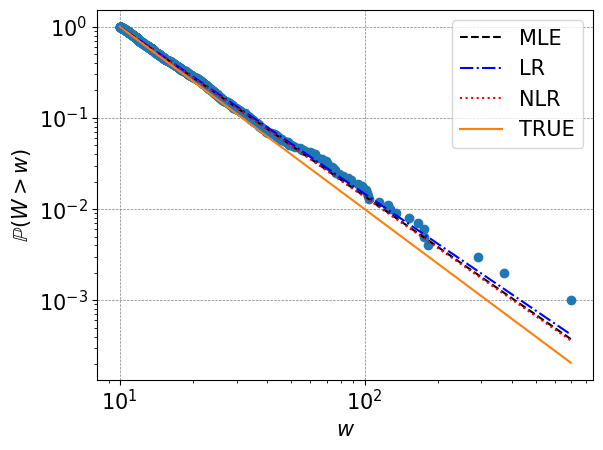

In [9]:
plt.loglog(x,y,'o')
plt.loglog(pareto_fit_vec[0],pareto_fit_vec[1],color='black',linestyle='--',label='MLE')
plt.loglog(pl_reg_fit_vec[0],pl_reg_fit_vec[1],color='blue',linestyle='-.',label='LR')
plt.loglog(pl_nl_fit_vec[0],pl_nl_fit_vec[1],color='red',linestyle=':',label='NLR')
plt.loglog(x,(x_m/x)**b,label='TRUE')
add_labels(plt,*label_arr1)

In [10]:
a=x_m**b
e=y-a*x**(-b)
e1=1+a**-1*x**b*e
e2=np.log10(e1)

p=np.sqrt(n)*(np.sqrt(a*x**-b/(1-a*x**-b)))

print(np.var(e),np.var(e1))
print(np.mean(e),np.mean(e1),np.mean(e2))

5.664848862223629e-05 0.032674005439803075
0.01893785483366452 1.0922004099132623 0.03491683806489117


In [11]:
p[-1]

0.4544288933554205

(array([ 1.,  0.,  1.,  1.,  2.,  4.,  1.,  2.,  0.,  1.,  0.,  2.,  4.,
         3.,  3.,  3.,  0.,  2.,  2.,  5.,  6.,  5.,  4.,  8.,  7.,  5.,
         5., 11., 13., 18., 23., 20., 15., 19., 11., 16., 14., 16., 24.,
        23., 28., 30., 27., 25., 19., 11., 15., 13., 11., 14.,  8., 11.,
         9.,  9., 13., 15.,  9., 14.,  9., 13.,  8., 12., 19., 24., 21.,
        20., 15., 14., 20., 17., 15., 18., 14., 17., 19.,  7., 14., 12.,
         4., 18.,  7.,  8.,  9.,  9.,  6.,  4.,  6.,  5.,  5.,  5.,  6.,
         6.,  4.,  1.,  0.,  2.,  3.,  2.,  0.,  1.]),
 array([-0.00090677, -0.00052974, -0.0001527 ,  0.00022433,  0.00060137,
         0.0009784 ,  0.00135544,  0.00173247,  0.00210951,  0.00248654,
         0.00286358,  0.00324061,  0.00361765,  0.00399468,  0.00437172,
         0.00474875,  0.00512579,  0.00550282,  0.00587986,  0.00625689,
         0.00663393,  0.00701096,  0.007388  ,  0.00776503,  0.00814207,
         0.0085191 ,  0.00889614,  0.00927317,  0.00965021,  0.010027

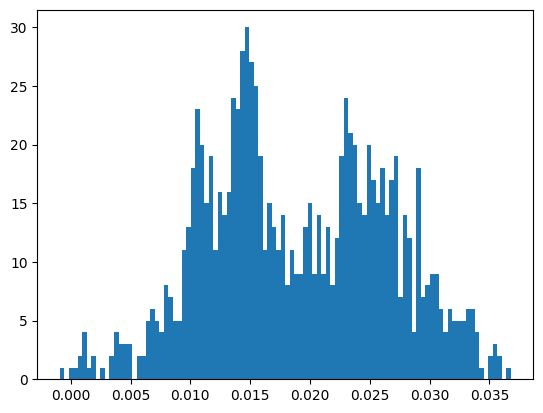

In [12]:
plt.hist(e,bins=100)
# plt.xlim(-0.01,0.01)

(array([  1.,   0.,   0.,   0.,   1.,   1.,   2.,   4.,   3.,   7.,   6.,
         14.,   6.,   3.,  10.,  10., 149., 597., 179.,   6.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.48476467, 0.51231748, 0.5398703 , 0.56742312, 0.59497594,
        0.62252876, 0.65008158, 0.6776344 , 0.70518722, 0.73274004,
        0.76029286, 0.78784568, 0.8153985 , 0.84295131, 0.87050413,
        0.89805695, 0.92560977, 0.95316259, 0.98071541, 1.00826823,
        1.03582105, 1.06337387, 1.09092669, 1.

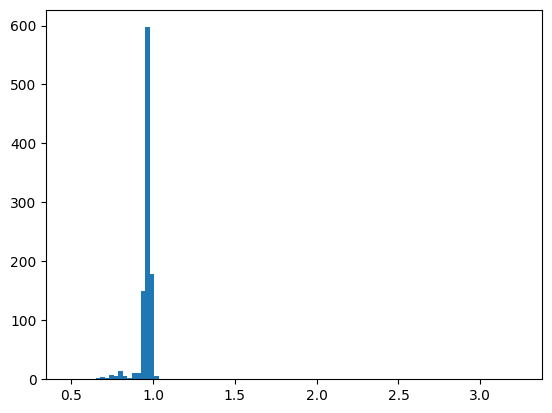

In [54]:
plt.hist(e1,bins=100)
# plt.xlim(0.9,1.1)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.,   1.,   3.,   2.,   2.,   0.,
          4.,   4.,   2.,   6.,   8.,   7.,   2.,   1.,   2.,   7.,   7.,
          6.,  61., 248., 417., 137.,  66.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.31446904, -0.30621884, -0.29796864, -0.28971843, -0.28146823,
        -0.27321803, -0.26496783, -0.25671762, -0.24846742, -0.24021722,
        -0.23196701, -0.22371681, -0.21546661, -0.2072164 , -0.1989662 ,
        -0.190716  , -0.1824658 , -0.17421559, -0.16596539, -0.15771519,
        -0.14946498, -0.14

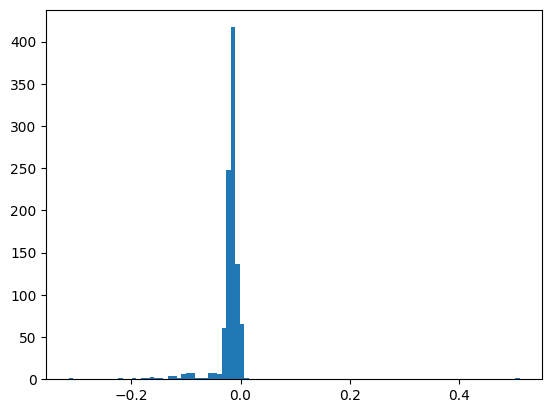

In [55]:
plt.hist(e2,bins=100)

In [75]:
print(mean_squared_error(y,pareto_fit_vec[1]))
print(mean_squared_error(y,pl_reg_fit_vec[1]))
print(mean_squared_error(y,pl_nl_fit_vec[1]))

8.988262034826546e-05
0.00010905888299937608
8.77028257324139e-05


In [76]:
bs=np.arange(1.1,2.1,0.1)
x_m=10
n_e=100
# ns=[50,10**2,10**3,10**4]
interv=50
maxr=5*10**3
ns=np.arange(interv,maxr+interv,interv)

In [77]:
%%time

print(len(bs),len(ns))

b_mle_mat=np.empty((len(bs),len(ns)))
b_lr_mat=np.empty((len(bs),len(ns)))
b_nlr_mat=np.empty((len(bs),len(ns)))

b_std_mle_mat=np.empty((len(bs),len(ns)))
b_std_lr_mat=np.empty((len(bs),len(ns)))
b_std_nlr_mat=np.empty((len(bs),len(ns)))

mse_mle_mat=np.empty((len(bs),len(ns)))
mse_lr_mat=np.empty((len(bs),len(ns)))
mse_nlr_mat=np.empty((len(bs),len(ns)))

b0=1

for i in range(len(bs)):
    for j in range(len(ns)):
        
        print([i,j])
        
        b_mle_vec=[]
        b_lr_vec=[]
        b_nlr_vec=[]
        
        mse_mle_vec=[]
        mse_lr_vec=[]
        mse_nlr_vec=[]
        
        for k in range(n_e):
            pareto_sample=pareto.rvs(bs[i], scale=x_m, size=ns[j])
            
            x,y=tail(pareto_sample)
            
            pareto_fit_vec=get_power_law_fit(pareto_sample,x_m) #MLE fit
            pl_reg_fit_vec=pl_reg_fit(pareto_sample,x_m) #Linear regression fit, 1 param free
            pl_nl_fit_vec=pl_nlr_fit(pareto_sample,b0,x_m)  #Non-linear regression fit, 1 param free
        
            mse_mle=mean_squared_error(y,pareto_fit_vec[1])
            mse_lr=mean_squared_error(y,pl_reg_fit_vec[1])
            mse_nlr=mean_squared_error(y,pl_nl_fit_vec[1])
            
            b_mle_vec.append(pareto_fit_vec[3])
            b_lr_vec.append(pl_reg_fit_vec[3])
            b_nlr_vec.append(pl_nl_fit_vec[3])
            
            mse_mle_vec.append(mse_mle)
            mse_lr_vec.append(mse_lr)
            mse_nlr_vec.append(mse_nlr)
            
        b_mle_mean=np.mean(b_mle_vec)
        b_lr_mean=np.mean(b_lr_vec)
        b_nlr_mean=np.mean(b_nlr_vec)
        
        b_mle_std=np.std(b_mle_vec)
        b_lr_std=np.std(b_lr_vec)
        b_nlr_std=np.std(b_nlr_vec)
        
        mse_mle_mean=np.mean(mse_mle_vec)
        mse_lr_mean=np.mean(mse_lr_vec)
        mse_nlr_mean=np.mean(mse_nlr_vec)

        b_mle_mat[i,j]=b_mle_mean
        b_lr_mat[i,j]=b_lr_mean
        b_nlr_mat[i,j]=b_nlr_mean
        
        b_std_mle_mat[i,j]=b_mle_std
        b_std_lr_mat[i,j]=b_lr_std
        b_std_nlr_mat[i,j]=b_nlr_std
        
        mse_mle_mat[i,j]=mse_mle_mean
        mse_lr_mat[i,j]=mse_lr_mean
        mse_nlr_mat[i,j]=mse_nlr_mean
      

10 100
[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[0, 11]
[0, 12]
[0, 13]
[0, 14]
[0, 15]
[0, 16]
[0, 17]
[0, 18]
[0, 19]
[0, 20]
[0, 21]
[0, 22]
[0, 23]
[0, 24]
[0, 25]
[0, 26]
[0, 27]
[0, 28]
[0, 29]
[0, 30]
[0, 31]
[0, 32]
[0, 33]
[0, 34]
[0, 35]
[0, 36]
[0, 37]
[0, 38]
[0, 39]
[0, 40]
[0, 41]
[0, 42]
[0, 43]
[0, 44]
[0, 45]
[0, 46]
[0, 47]
[0, 48]
[0, 49]
[0, 50]
[0, 51]
[0, 52]
[0, 53]
[0, 54]
[0, 55]
[0, 56]
[0, 57]
[0, 58]
[0, 59]
[0, 60]
[0, 61]
[0, 62]
[0, 63]
[0, 64]
[0, 65]
[0, 66]
[0, 67]
[0, 68]
[0, 69]
[0, 70]
[0, 71]
[0, 72]
[0, 73]
[0, 74]
[0, 75]
[0, 76]
[0, 77]
[0, 78]
[0, 79]
[0, 80]
[0, 81]
[0, 82]
[0, 83]
[0, 84]
[0, 85]
[0, 86]
[0, 87]
[0, 88]
[0, 89]
[0, 90]
[0, 91]
[0, 92]
[0, 93]
[0, 94]
[0, 95]
[0, 96]
[0, 97]
[0, 98]
[0, 99]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[1, 11]
[1, 12]
[1, 13]
[1, 14]
[1, 15]
[1, 16]
[1, 17]
[1, 18]
[1, 19]
[1, 20]
[1, 21]
[1, 22]
[1, 23]
[1, 24]
[1, 25]
[1, 2

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

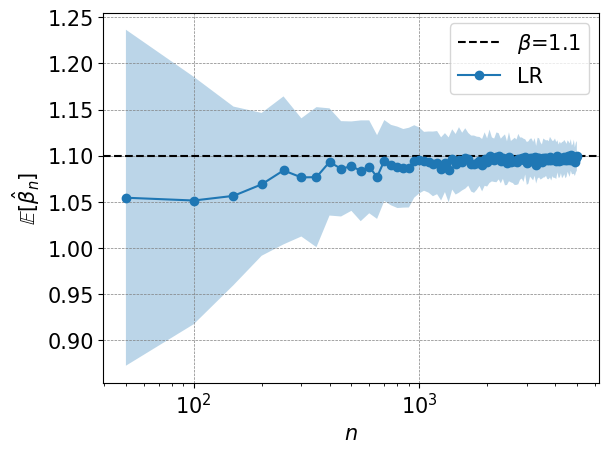

In [80]:
k=0
label_b_hat=['$n$',r'$\mathbb{E}[\hat{\beta}_n]$',font_sizes,1]
plt.axhline(bs[k],color='black',linestyle='--',label=r'$\beta$={}'.format(np.round(bs[k],2)))

# plt.semilogx(ns,b_mle_mat[k,:],'-o',label='MLE',alpha=1)
plt.semilogx(ns,b_lr_mat[k,:],'-o',label='LR',alpha=1)
# plt.semilogx(ns,b_nlr_mat[k,:],'-o',label='NLR',alpha=1)

# plt.plot(ns,b_mle_mat[k,:],'-o',label='MLE',alpha=1)
# plt.plot(ns,b_lr_mat[k,:],'-o',label='LR',alpha=1)
# plt.plot(ns,b_nlr_mat[k,:],'-o',label='NLR',alpha=1)

# plt.fill_between(ns,b_mle_mat[k,:]-b_std_mle_mat[k,:],b_mle_mat[k,:]+b_std_mle_mat[k,:],alpha=0.3)
plt.fill_between(ns,b_lr_mat[k,:]-b_std_lr_mat[k,:],b_lr_mat[k,:]+b_std_lr_mat[k,:],alpha=0.3)
# plt.fill_between(ns,b_nlr_mat[k,:]-b_std_nlr_mat[k,:],b_nlr_mat[k,:]+b_std_nlr_mat[k,:],alpha=0.3)

add_labels(plt,*label_b_hat)

# plt.savefig(direc_save+'beta_fit_eg',bbox_inches = 'tight')

In [81]:
b_lr_mat[k,:]

array([1.054459  , 1.05143555, 1.05646949, 1.06895693, 1.08407134,
       1.07647574, 1.07674446, 1.09321299, 1.08578071, 1.08868612,
       1.08363349, 1.08793118, 1.07690599, 1.09476283, 1.08979135,
       1.08740708, 1.08632381, 1.0870838 , 1.09375082, 1.09487714,
       1.09393056, 1.09310321, 1.09112442, 1.09249215, 1.08571425,
       1.09250074, 1.08463422, 1.09591198, 1.09072886, 1.0953864 ,
       1.09365461, 1.09700714, 1.09605141, 1.0914745 , 1.09078112,
       1.09183641, 1.09381067, 1.08972796, 1.09634628, 1.09271021,
       1.09939032, 1.09597077, 1.09504932, 1.09820783, 1.09934343,
       1.09425668, 1.09796546, 1.09547785, 1.09195464, 1.0988275 ,
       1.09352408, 1.09400315, 1.09383866, 1.09296044, 1.09635098,
       1.0968304 , 1.09748737, 1.09499873, 1.09866685, 1.09165792,
       1.092701  , 1.09774691, 1.09701925, 1.094109  , 1.09858684,
       1.09019385, 1.09731288, 1.09765975, 1.0942956 , 1.09359189,
       1.0974596 , 1.09701076, 1.09732114, 1.09580727, 1.09505

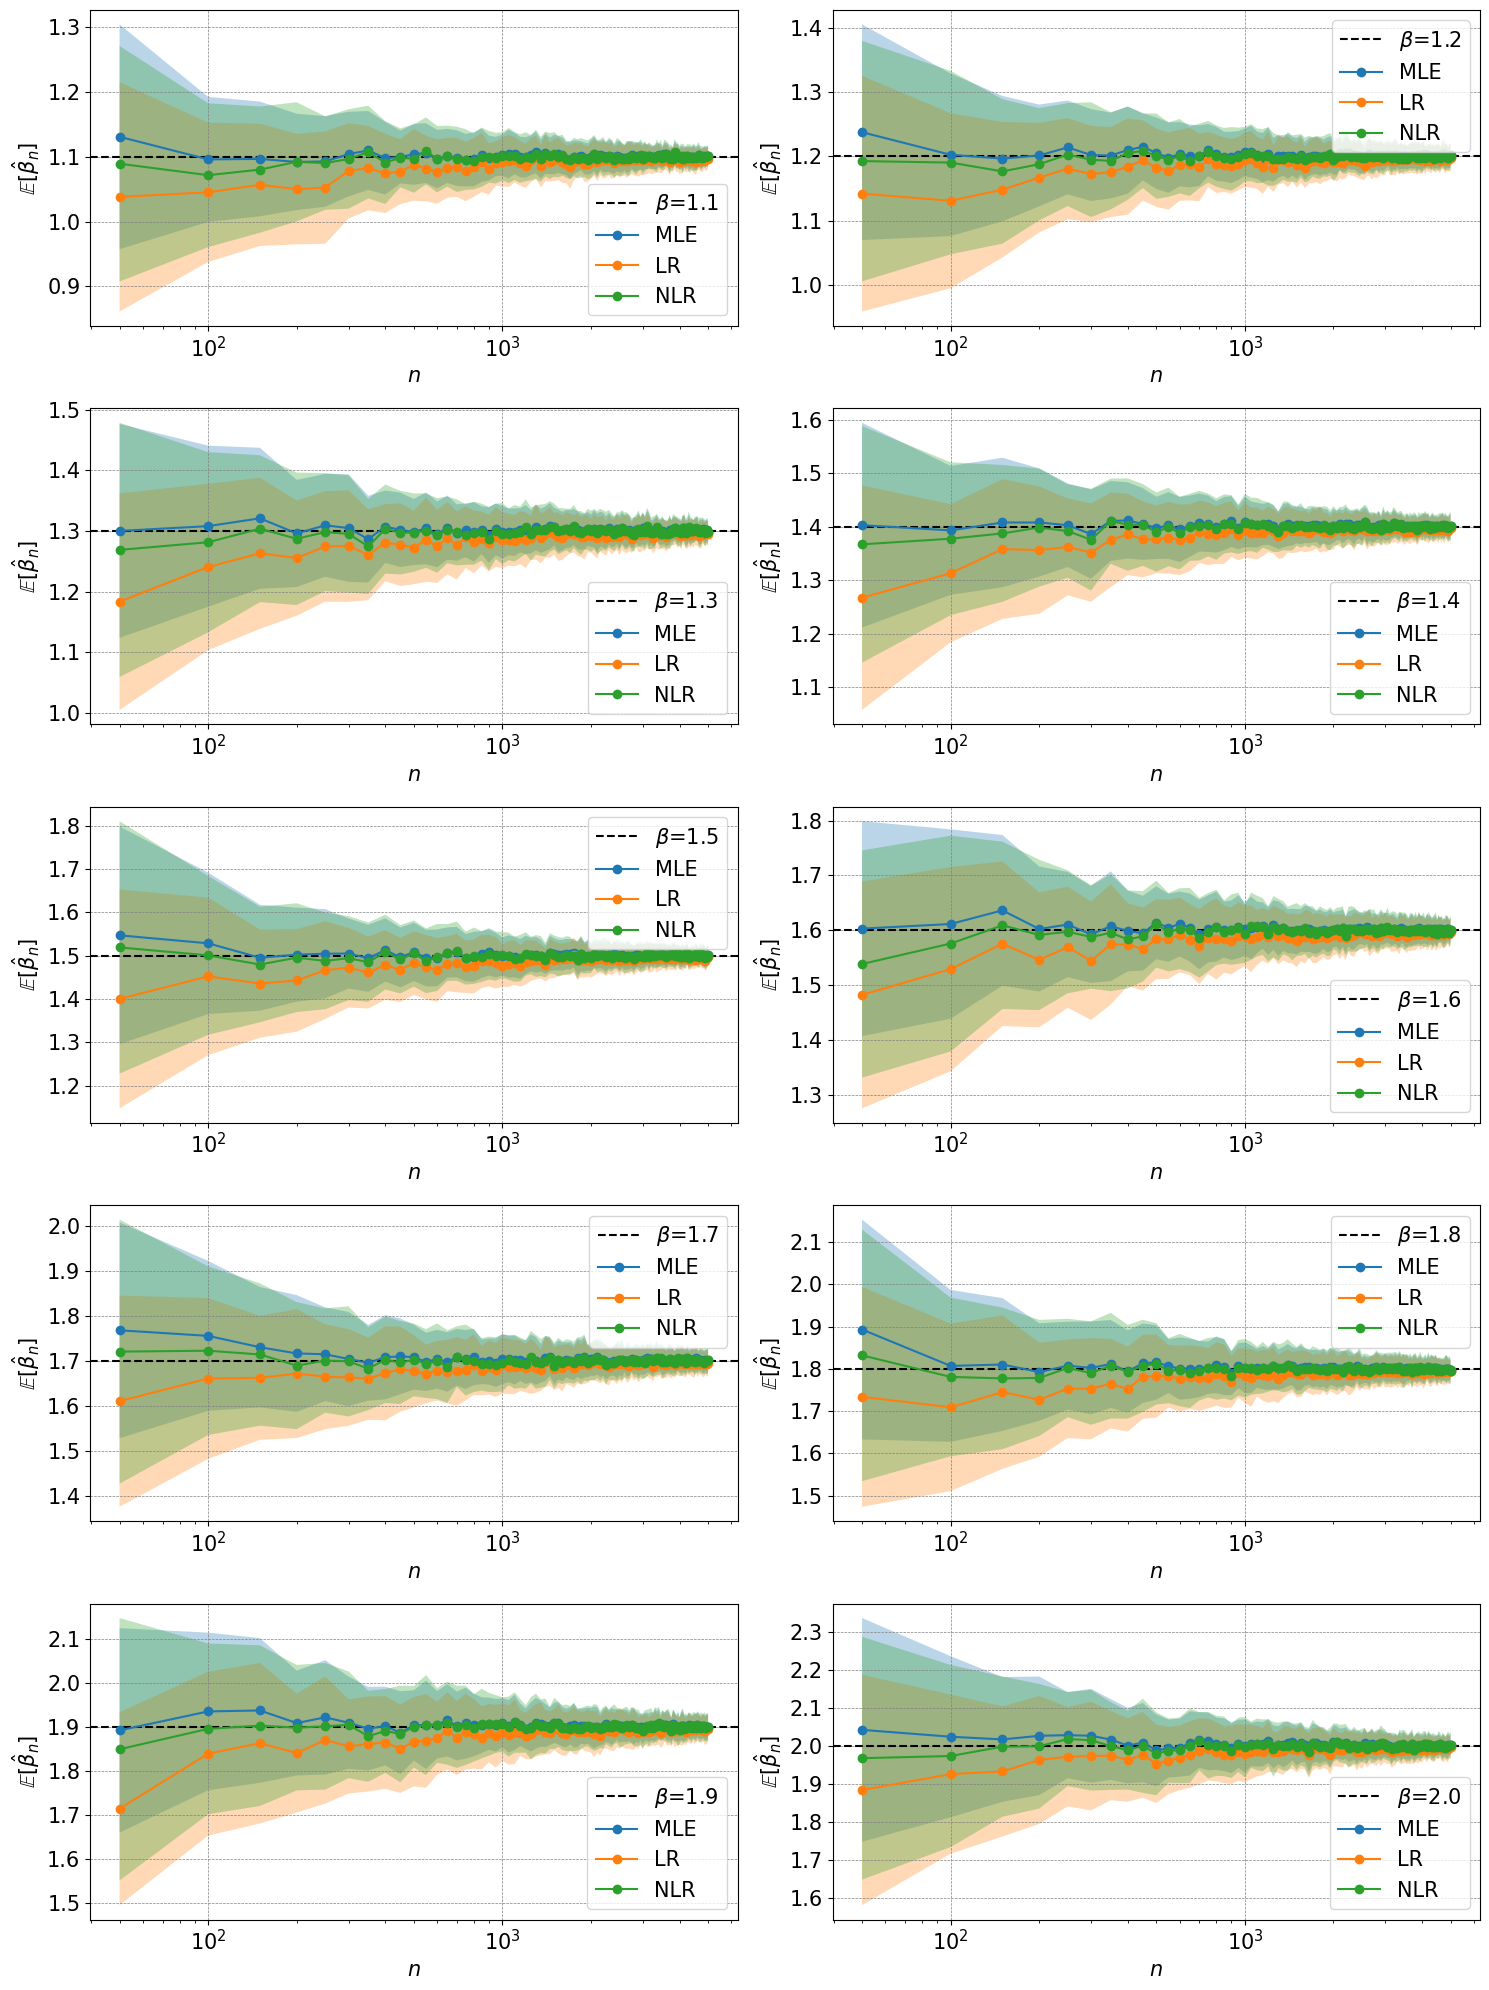

In [13]:
plt.figure(figsize=(15,20))
for k in range(len(bs)):
    plt.subplot(5, 2, k+1)
    label_b_hat=['$n$',r'$\mathbb{E}[\hat{\beta}_n]$',font_sizes,1]
    plt.axhline(bs[k],color='black',linestyle='--',label=r'$\beta$={}'.format(np.round(bs[k],2)))

    plt.semilogx(ns,b_mle_mat[k,:],'-o',label='MLE',alpha=1)
    plt.semilogx(ns,b_lr_mat[k,:],'-o',label='LR',alpha=1)
    plt.semilogx(ns,b_nlr_mat[k,:],'-o',label='NLR',alpha=1)

    plt.fill_between(ns,b_mle_mat[k,:]-b_std_mle_mat[k,:],b_mle_mat[k,:]+b_std_mle_mat[k,:],alpha=0.3)
    plt.fill_between(ns,b_lr_mat[k,:]-b_std_lr_mat[k,:],b_lr_mat[k,:]+b_std_lr_mat[k,:],alpha=0.3)
    plt.fill_between(ns,b_nlr_mat[k,:]-b_std_nlr_mat[k,:],b_nlr_mat[k,:]+b_std_nlr_mat[k,:],alpha=0.3)

    add_labels(plt,*label_b_hat)
    
plt.tight_layout()

# plt.savefig(direc_save+'beta_fits',bbox_inches = 'tight')

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

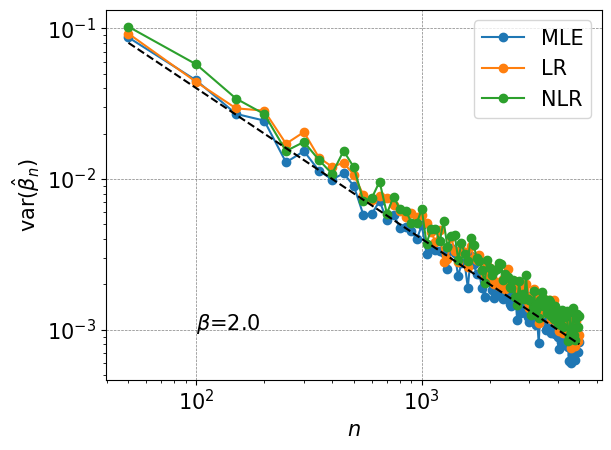

In [14]:
label_b_hat_var=['$n$',r'var$(\hat{\beta}_n)$',font_sizes,1]
k=9
plt.loglog(ns,b_std_mle_mat[k,:]**2,'-o',label='MLE',alpha=1)
plt.semilogx(ns,b_std_lr_mat[k,:]**2,'-o',label='LR',alpha=1)
plt.semilogx(ns,b_std_nlr_mat[k,:]**2,'-o',label='NLR',alpha=1)

plt.plot(ns,power_law(ns,4,-1.0),linestyle='--',color='black')
plt.text(10**2,10**(-3),r'$\beta$={}'.format(np.round(bs[k],2)),fontsize=15)

add_labels(plt,*label_b_hat_var)

# plt.savefig(direc_save+'var_beta_fit_eg',bbox_inches = 'tight')

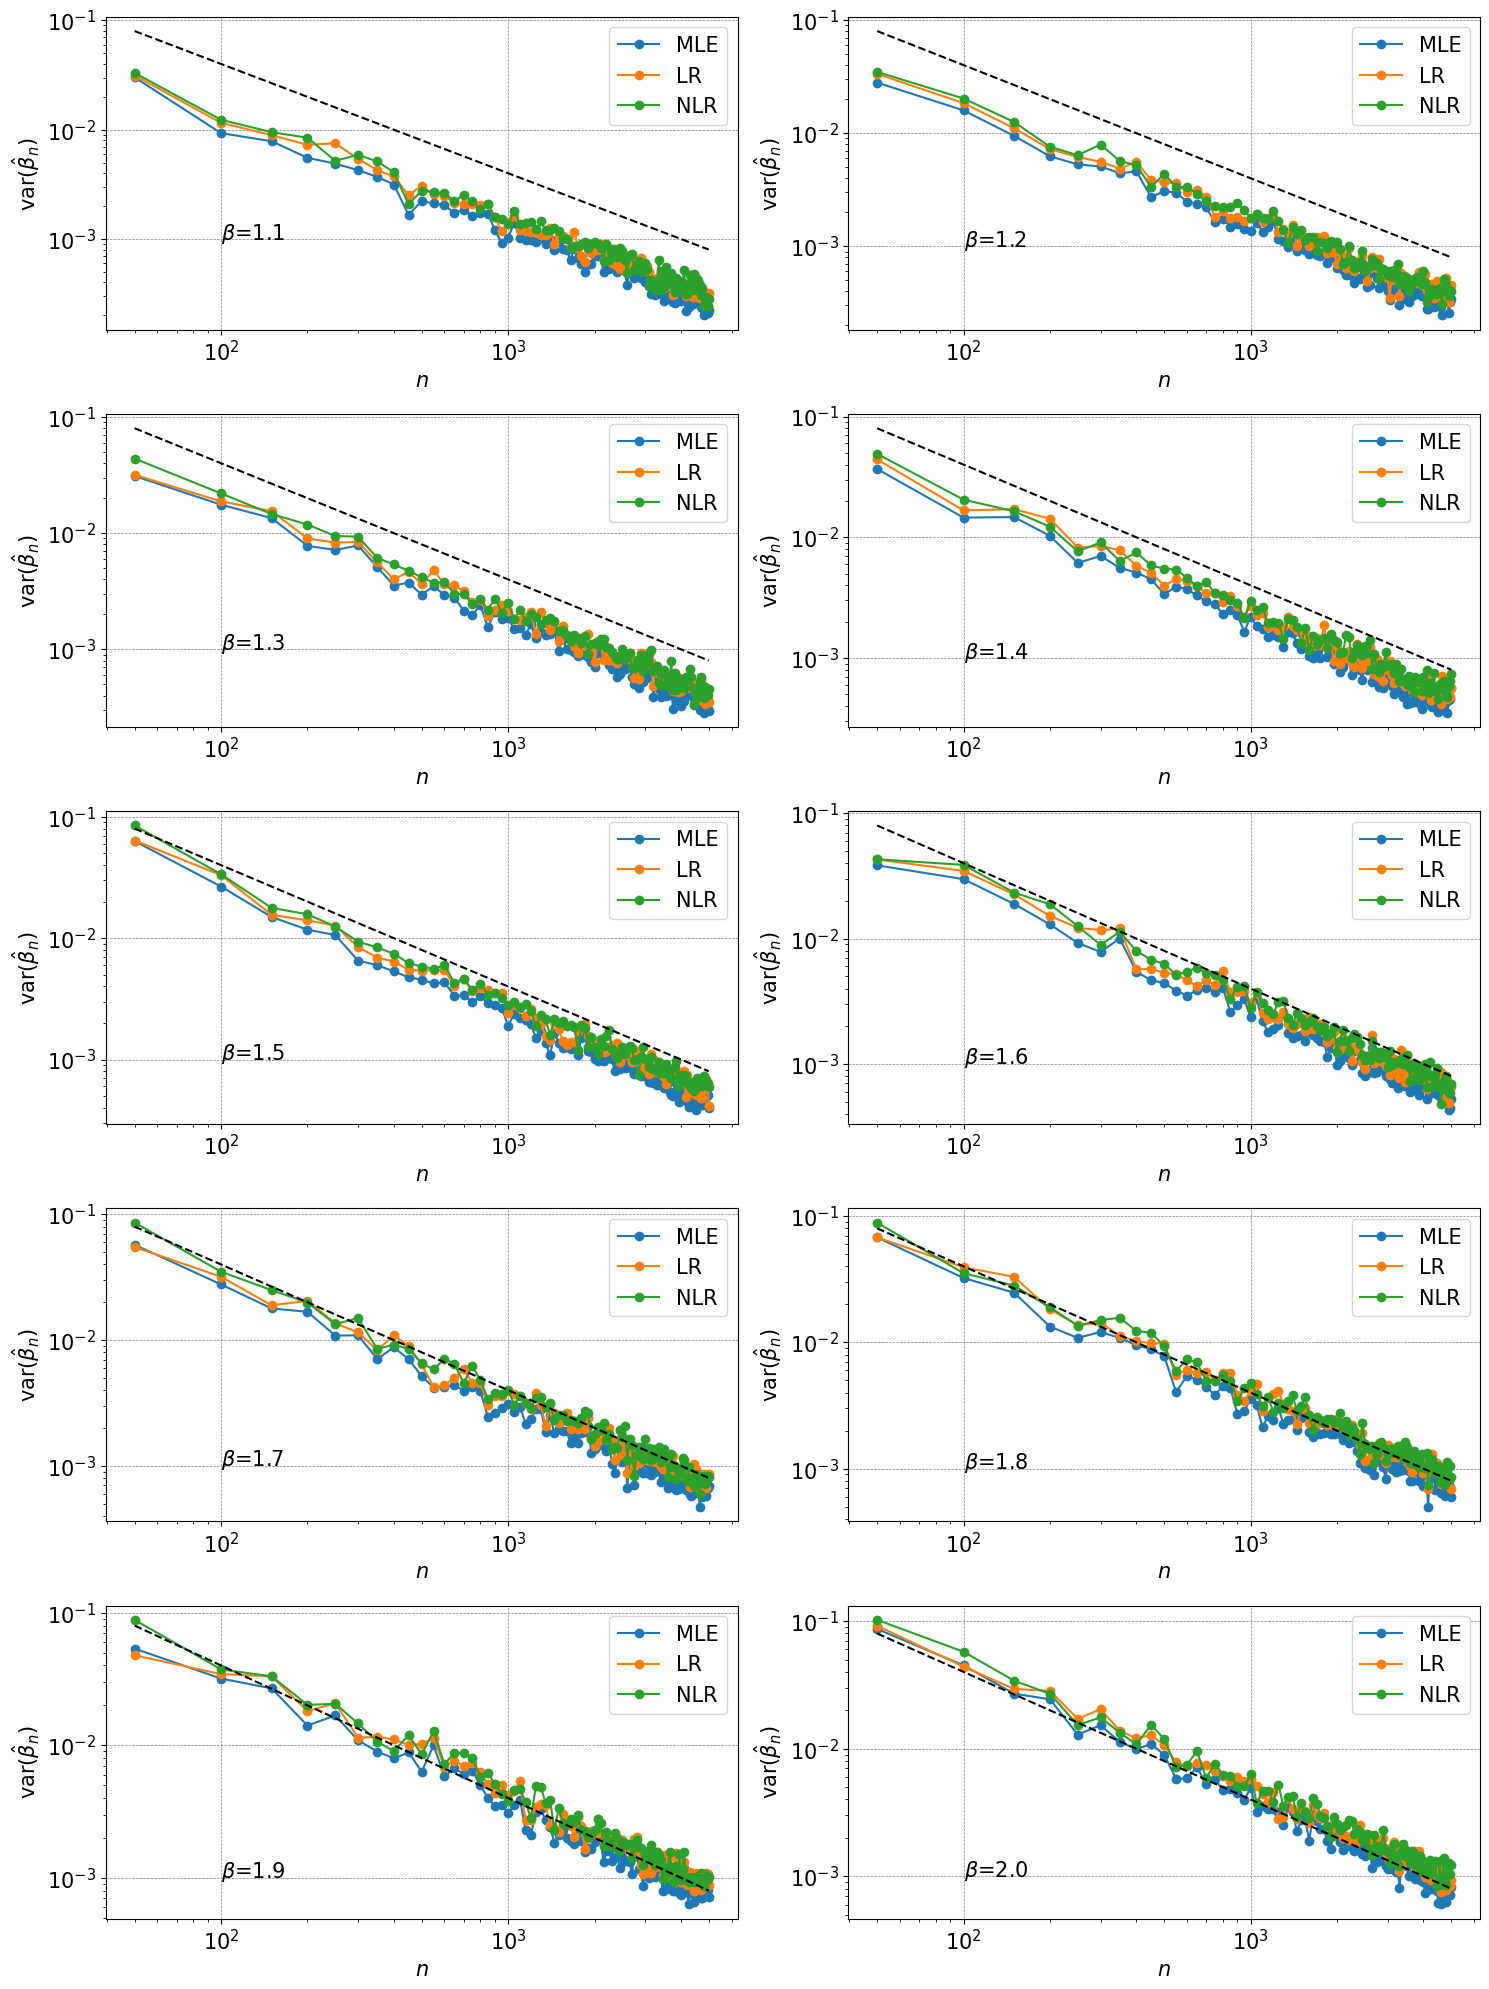

In [15]:
plt.figure(figsize=(15,20))
for k in range(len(bs)):
    plt.subplot(5, 2, k+1)
    plt.loglog(ns,b_std_mle_mat[k,:]**2,'-o',label='MLE',alpha=1)
    plt.semilogx(ns,b_std_lr_mat[k,:]**2,'-o',label='LR',alpha=1)
    plt.semilogx(ns,b_std_nlr_mat[k,:]**2,'-o',label='NLR',alpha=1)

    plt.plot(ns,power_law(ns,4,-1.0),linestyle='--',color='black')
    plt.text(10**2,10**(-3),r'$\beta$={}'.format(np.round(bs[k],2)),fontsize=15)

    add_labels(plt,*label_b_hat_var)
    
    
plt.tight_layout()

# plt.savefig(direc_save+'var_beta_fits',bbox_inches = 'tight')

Text(100, 0.0001, '$\\beta$=1.2')

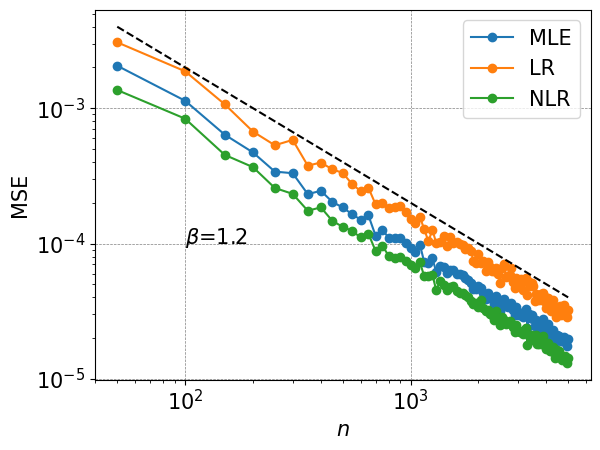

In [16]:
k=1
label_mse=['$n$','MSE',font_sizes,1]
plt.loglog(ns,mse_mle_mat[k,:],'-o',label='MLE')
plt.plot(ns,mse_lr_mat[k,:],'-o',label='LR')
plt.plot(ns,mse_nlr_mat[k,:],'-o',label='NLR')
add_labels(plt,*label_mse)
plt.plot(ns,power_law(ns,0.2,-1.0),linestyle='--',color='black')
plt.text(10**2,10**(-4),r'$\beta$={}'.format(np.round(bs[k],2)),fontsize=15)

# plt.savefig(direc_save+'mse_beta_fit_eg',bbox_inches = 'tight')

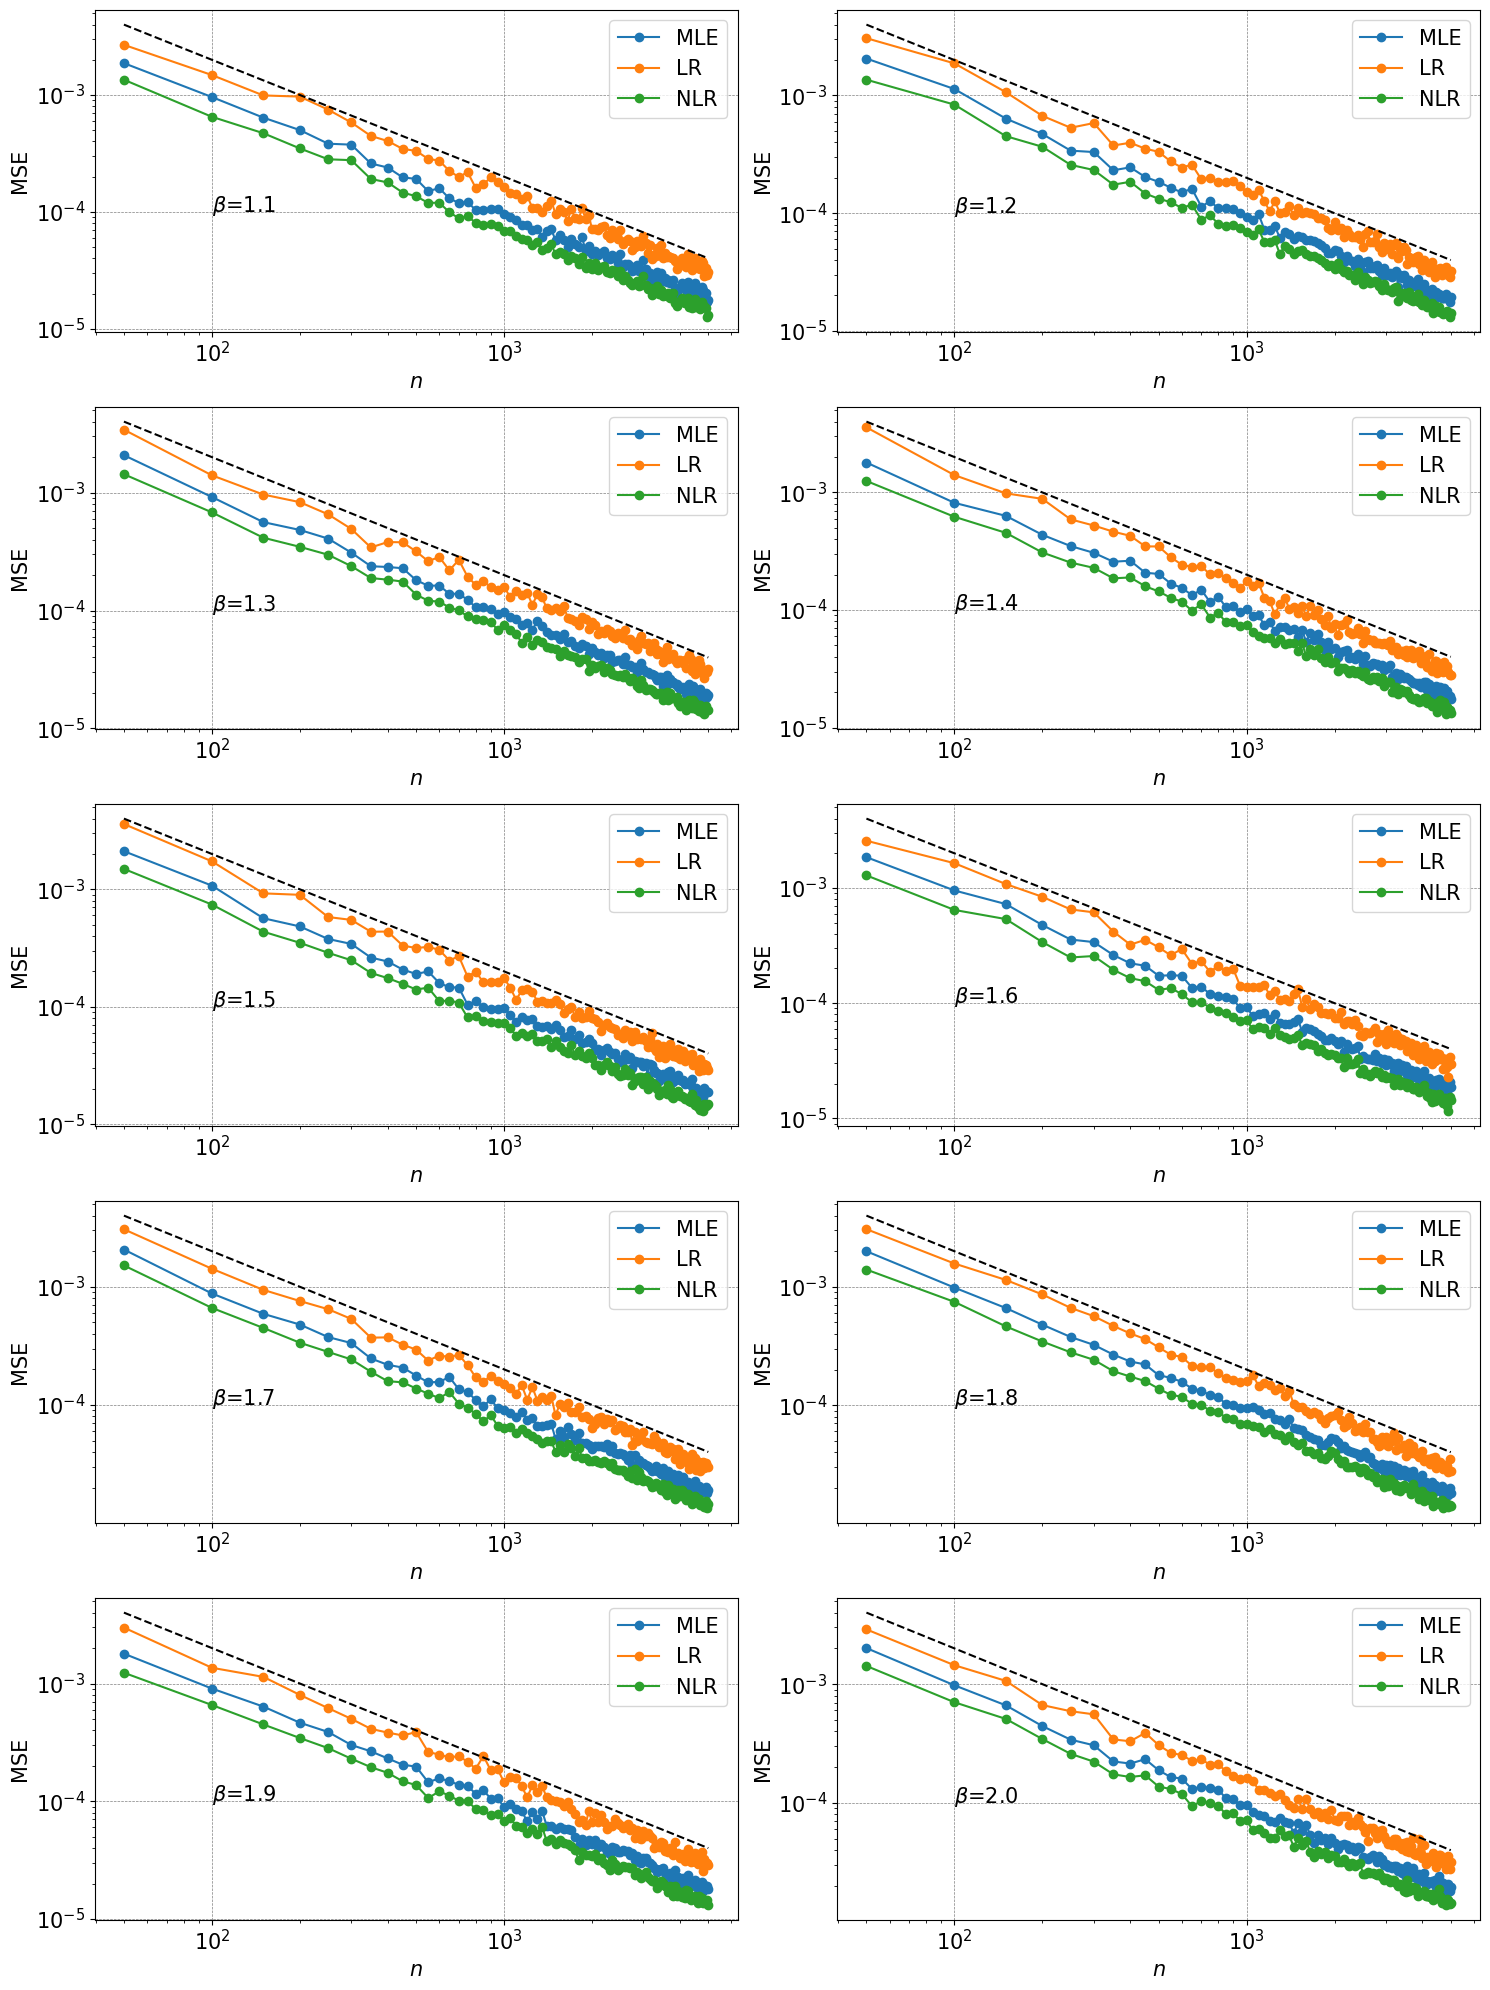

In [17]:
plt.figure(figsize=(15,20))
for k in range(len(bs)):
    plt.subplot(5, 2, k+1)
    plt.loglog(ns,mse_mle_mat[k,:],'-o',label='MLE')
    plt.plot(ns,mse_lr_mat[k,:],'-o',label='LR')
    plt.plot(ns,mse_nlr_mat[k,:],'-o',label='NLR')
    plt.plot(ns,power_law(ns,0.2,-1.0),linestyle='--',color='black')
    add_labels(plt,*label_mse)
    plt.text(10**2,10**(-4),r'$\beta$={}'.format(np.round(bs[k],2)),fontsize=15)
    
    
plt.tight_layout()

# plt.savefig(direc_save+'mse_beta_fits',bbox_inches = 'tight')

In [18]:
def cum_mean(x):
    nc=np.arange(1,len(x)+1,1)
    return np.cumsum(x)/nc

In [19]:
%%time
bs=np.arange(1.1,2.1,0.1)
x_m=10
n=10**2
ns=10**4
b0=1

bs_pred=[]

for i in range(len(bs)):

    b_mle_vec=[]
    b_lr_vec=[]
    b_nlr_vec=[]

    for j in range(ns):
        pareto_sample=pareto.rvs(bs[i], scale=x_m, size=n)

        pareto_fit_vec=get_power_law_fit(pareto_sample,x_m) #MLE fit
        pl_reg_fit_vec=pl_reg_fit(pareto_sample,x_m) #Linear regression fit, 1 param free
        pl_nl_fit_vec=pl_nlr_fit(pareto_sample,b0,x_m)  #Non-linear regression fit, 1 param free

        b_mle_vec.append(pareto_fit_vec[3])
        b_lr_vec.append(pl_reg_fit_vec[3])
        b_nlr_vec.append(pl_nl_fit_vec[3])
               
    bs_pred.append([b_mle_vec,b_lr_vec,b_nlr_vec])
               
    
    

CPU times: user 2min 45s, sys: 76 ms, total: 2min 45s
Wall time: 2min 45s


In [22]:
ns_vec=np.arange(1,ns+1,1)

In [24]:
bs_expect=[]

for i in range(len(bs)):
    mean_b_mle_vec=cum_mean(bs_pred[i][0])
    mean_b_lr_vec=cum_mean(bs_pred[i][1])
    mean_b_nlr_vec=cum_mean(bs_pred[i][2])
    bs_expect.append([mean_b_mle_vec,mean_b_lr_vec,mean_b_nlr_vec])

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

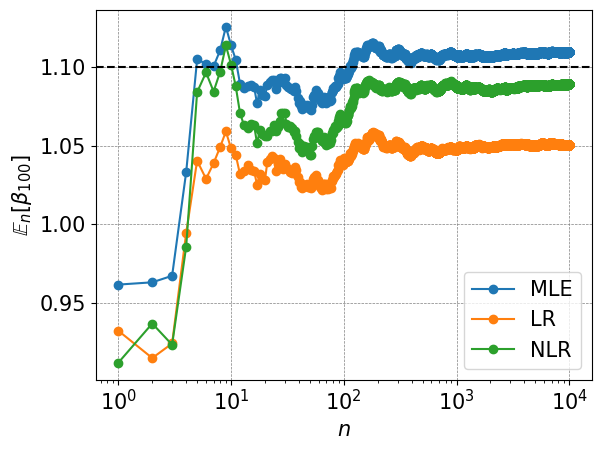

In [25]:
# label_expect_beta=[r'$n$',r'$\mathbb{E}_n[\beta_{}]$'.format({n}),font_sizes,1]
label_expect_beta=[r'$n$',r'$\mathbb{E}_n[\beta_{100}]$',font_sizes,1]
k=0
plt.semilogx(ns_vec,bs_expect[k][0],'-o',label='MLE')
plt.plot(ns_vec,bs_expect[k][1],'-o',label='LR')
plt.plot(ns_vec,bs_expect[k][2],'-o',label='NLR')
plt.axhline(bs[k],linestyle='--',color='black')
add_labels(plt,*label_expect_beta)

# plt.savefig(direc_save+'exp_beta_fit_eg',bbox_inches = 'tight')

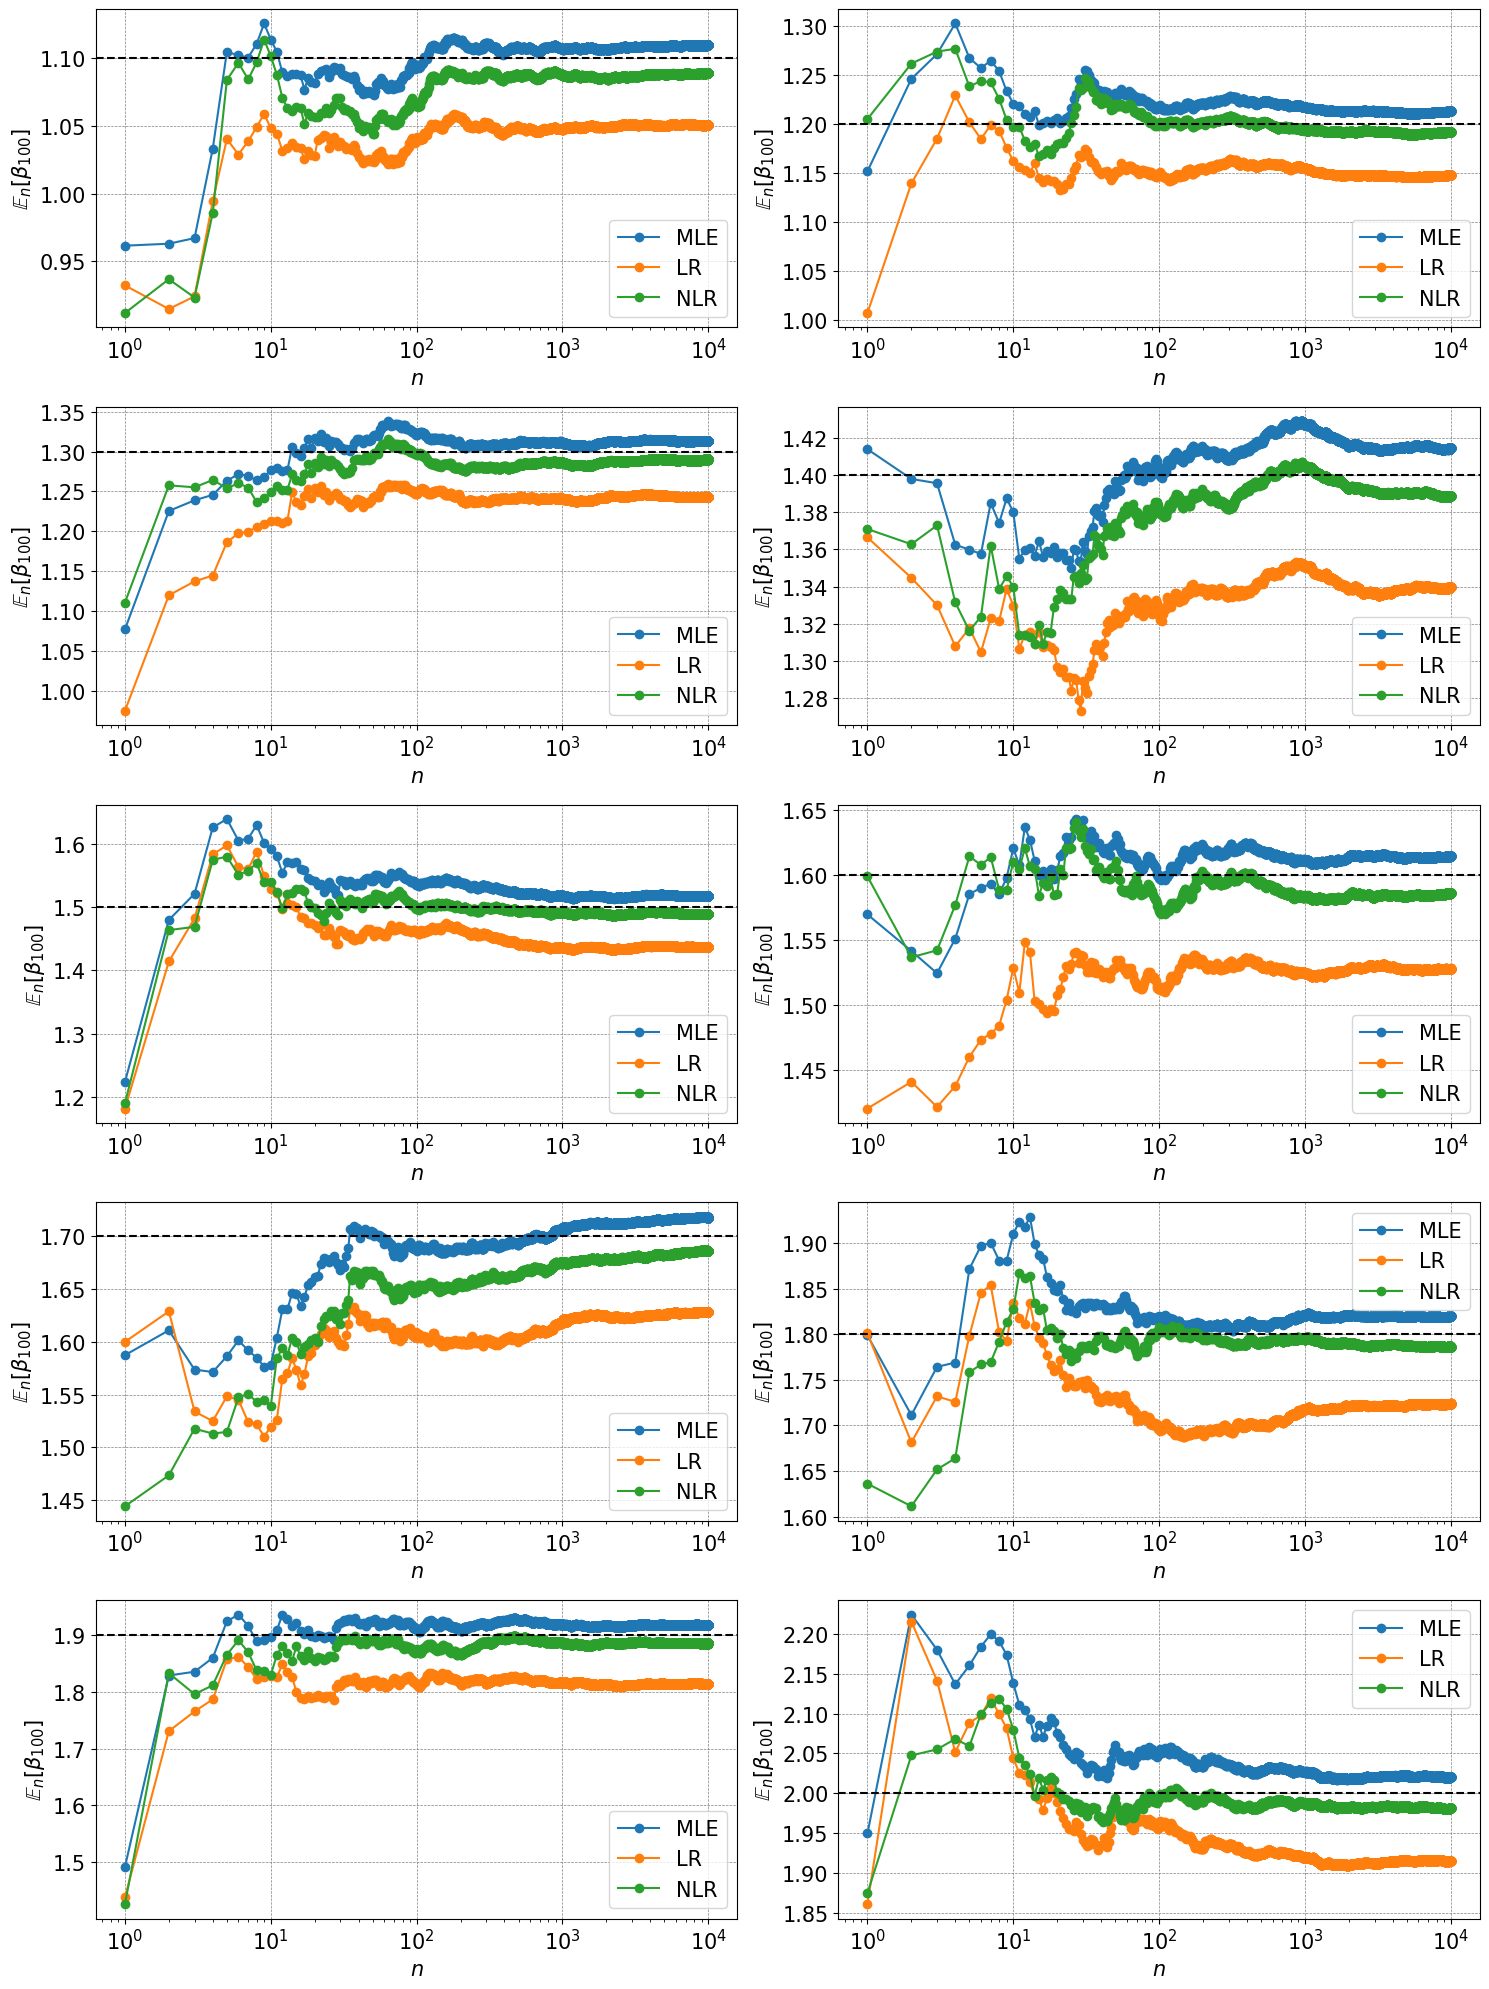

In [26]:
plt.figure(figsize=(15,20))
for k in range(len(bs)):
    plt.subplot(5, 2, k+1)
    plt.semilogx(ns_vec,bs_expect[k][0],'-o',label='MLE')
    plt.plot(ns_vec,bs_expect[k][1],'-o',label='LR')
    plt.plot(ns_vec,bs_expect[k][2],'-o',label='NLR')
    plt.axhline(bs[k],linestyle='--',color='black')
    add_labels(plt,*label_expect_beta)
    
plt.tight_layout()

# plt.savefig(direc_save+'exp_beta_fits',bbox_inches = 'tight')